# Login

In [1]:
import login
print(login.get_authorization_code())

https://api-t1.fyers.in/api/v3/generate-authcode?client_id=24XH7LLI3A-100&redirect_uri=https%3A%2F%2Fwww.google.com&response_type=code&state=None


In [2]:
import pandas as pd

config_df = pd.read_csv("cred.csv")
config = config_df.iloc[0].to_dict()
refresh_token = config["refresh_token"]

login.get_access_token(refresh_token,login_type="refresh_token")

✅ Access Token saved successfully in cred.csv
🔄 Refresh Token saved (valid for 15 days)


'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3NDI0MDI1MTgsImV4cCI6MTc0MjQzMDY1OCwibmJmIjoxNzQyNDAyNTE4LCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbjJ2UFdPbWxKR1l5d0NFYTh3VXhMb3lrak56Y0k5emtHcWJ2MGJyaGdWVndFTWZEWnBBQUthSzZTa19vU0IzX3hMZE9tSkJaWW5ybUNId2c4OVctTk1pUHZhTDRXNzBHcmhDT3EzVVEzRTZkVzhqMD0iLCJkaXNwbGF5X25hbWUiOiJTVVBSSVlPIEJIQVRUQUNIQVJZQSIsIm9tcyI6IksxIiwiaHNtX2tleSI6ImEyZjNjNmZiNGQzNjcyZmE3YzQxMjliYWFmYjk0MTdiMjRiNTk1OTE5NTdmZjJiZTg2NDYxMzU4IiwiaXNEZHBpRW5hYmxlZCI6Ik4iLCJpc010ZkVuYWJsZWQiOiJOIiwiZnlfaWQiOiJZUzM1ODc1IiwiYXBwVHlwZSI6MTAwLCJwb2FfZmxhZyI6Ik4ifQ.dNzBKuMpbn2YfeAz5t9HRxuJCkJ2W8ri1Ij2JRb1mhY'

# Data Fetching and Data Analysis

In [5]:
import pandas as pd
import datetime
import time
from fyers_apiv3 import fyersModel

# Load credentials from CSV
config = pd.read_csv("cred.csv").iloc[0].to_dict()
client_id = config["client_id"]
access_token = config["access_token"]

# Initialize FYERS Model
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

# Define symbol and date range parameters
symbol = "MCX:CRUDEOILM25APRFUT"  # Your chosen symbol
chunk_size = 100  # days per request (FYERS API limit)
total_days = 1000  # Total days to fetch

end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=total_days)

# Store all data
all_data = []

# Fetch data in chunks of 100 days (5 iterations for 500 days)
for _ in range(10):
    next_end_date = start_date + datetime.timedelta(days=chunk_size)
    if next_end_date > end_date:
        next_end_date = end_date

    requirement = {
        "symbol": symbol,
        "resolution": "5",  # 30-minute candles
        "date_format": "1",  # YYYY-MM-DD format
        "range_from": start_date.strftime("%Y-%m-%d"),
        "range_to": next_end_date.strftime("%Y-%m-%d"),
        "cont_flag": "1"
    }

    print(f"Fetching data from {requirement['range_from']} to {requirement['range_to']}...")
    try:
        response = fyers.history(data=requirement)
        if "candles" in response:
            df = pd.DataFrame(response["candles"], columns=["timestamp", "open", "high", "low", "close", "volume"])
            # Convert timestamp from Unix to datetime and add 5 hours 30 minutes for IST conversion
            df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s") + pd.Timedelta(hours=5, minutes=30)
            all_data.append(df)
        else:
            print("No data found:", response)
    except Exception as e:
        print("Error:", e)

    # Move start_date forward
    start_date = next_end_date
    time.sleep(1)  # To avoid API rate limits

# Combine all chunks into a single DataFrame
if all_data:
    final_df = pd.concat(all_data).sort_values(by="timestamp")
    print("✅ DataFrame is ready for analysis!")
else:
    final_df = pd.DataFrame()
    print("❌ No data retrieved.")

# Save the DataFrame to a CSV file
final_df.to_csv("model_train.csv", index=False)
print("✅ Data saved to model_train.csv")


Fetching data from 2022-06-22 to 2022-09-30...
Fetching data from 2022-09-30 to 2023-01-08...
Fetching data from 2023-01-08 to 2023-04-18...
Fetching data from 2023-04-18 to 2023-07-27...
Fetching data from 2023-07-27 to 2023-11-04...
Fetching data from 2023-11-04 to 2024-02-12...
Fetching data from 2024-02-12 to 2024-05-22...
Fetching data from 2024-05-22 to 2024-08-30...
Fetching data from 2024-08-30 to 2024-12-08...
Fetching data from 2024-12-08 to 2025-03-18...
✅ DataFrame is ready for analysis!
✅ Data saved to model_train.csv


In [6]:
import pandas as pd

basic_data=pd.read_csv("model_train.csv")
basic_data.shape

(90260, 6)

In [10]:
import pandas as pd
import pandas_ta as ta


# Calculate MACD, RSI, Stochastic, BB, SuperTrend, and OBV
basic_data.ta.macd(append=True)
basic_data.ta.rsi(append=True)
basic_data.ta.stoch(append=True)
basic_data.ta.bbands(append=True)
basic_data.ta.supertrend(append=True)
basic_data.ta.obv(append=True)


0            4.0
1            1.0
2            0.0
3            2.0
4            2.0
          ...   
90255   -18628.0
90256   -18707.0
90257   -18580.0
90258   -18484.0
90259   -18462.0
Name: OBV, Length: 90260, dtype: float64

In [11]:
basic_data.tail(10)

,timestamp,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,...,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,OBV
90250,2025-03-18 22:40:00,5804,5806,5800,5800,178,-18.363516,-0.128739,-18.234777,29.026071,...,5796.675445,5803.0,5809.324555,0.217975,0.262829,5835.256611,-1,NaN,5835.256611,-19297.0
90251,2025-03-18 22:45:00,5802,5810,5796,5797,424,-18.191436,0.034673,-18.226108,27.909074,...,5794.675445,5801.0,5807.324555,0.218051,0.183772,5835.256611,-1,NaN,5835.256611,-19721.0
90252,2025-03-18 22:50:00,5798,5852,5797,5831,913,-15.137055,2.471243,-17.608298,50.948029,...,5783.049230,5807.4,5831.750770,0.838612,0.984584,5835.256611,-1,NaN,5835.256611,-18808.0
90253,2025-03-18 22:55:00,5830,5832,5813,5813,223,-14.007417,2.880705,-16.888122,43.095763,...,5785.180999,5809.4,5833.619001,0.833787,0.574322,5835.256611,-1,NaN,5835.256611,-19031.0
90254,2025-03-18 23:00:00,5814,5815,5800,5814,303,-12.882972,3.204120,-16.087092,43.615685,...,5786.833908,5811.0,5835.166092,0.831736,0.562070,5835.256611,-1,NaN,5835.256611,-18728.0
90255,2025-03-18 23:05:00,5814,5819,5812,5815,100,-11.775410,3.449345,-15.224755,44.165079,...,5792.459341,5814.0,5835.540659,0.740993,0.523212,5835.256611,-1,NaN,5835.256611,-18628.0
90256,2025-03-18 23:10:00,5812,5815,5807,5810,79,-11.172330,3.241940,-14.414270,41.963414,...,5801.816225,5816.6,5831.383775,0.508330,0.276782,5835.256611,-1,NaN,5835.256611,-18707.0
90257,2025-03-18 23:15:00,5810,5814,5807,5811,127,-10.492739,3.137225,-13.629964,42.579939,...,5808.890553,5812.6,5816.309447,0.127635,0.284334,5835.256611,-1,NaN,5835.256611,-18580.0
90258,2025-03-18 23:20:00,5813,5815,5809,5815,96,-9.521632,3.286665,-12.808298,45.092547,...,5808.804765,5813.0,5817.195235,0.144340,0.738366,5835.256611,-1,NaN,5835.256611,-18484.0
90259,2025-03-18 23:25:00,5816,5818,5816,5818,22,-8.412969,3.516263,-11.929232,46.966911,...,5807.948504,5813.8,5819.651496,0.201297,0.858883,5835.256611,-1,NaN,5835.256611,-18462.0


if 2hours later closing price is 1% more : 1
if 2hours later closing price is 1% less: -1
else:0

2hours=4 data point

In [12]:
df=basic_data #Let not use our real data



# 1) Shift the 'close' by 4 rows to get the close price 2 hours later
df["future_close_2h"] = df["close"].shift(-24)

# 2) Calculate the percentage change over those 2 hours
df["future_return_2h"] = (df["future_close_2h"] - df["close"]) / df["close"]

# 3) Define your target using ±1% threshold
threshold = 0.0045  # 0.45%
df["target"] = 0
df.loc[df["future_return_2h"] >= threshold, "target"] = 1
df.loc[df["future_return_2h"] <= -threshold, "target"] = -1

# 4) Drop rows that no longer have valid future_close_2h (the last 4 rows)
df.dropna(subset=["future_close_2h"], inplace=True)

df.to_csv("current_dataset.csv")

In [18]:
# NSE:USDINR25APRFUT
# NSE:EURINR25APRFUT


# Define symbol and date range parameters
symbols = "NSE:USDINR25APRFUT"  # Your chosen symbol
chunk_size = 100  # days per request (FYERS API limit)
total_days = 1000  # Total days to fetch

end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=total_days)

# Store all data
all_data = []

# Fetch data in chunks of 100 days (5 iterations for 500 days)
for _ in range(10):
    next_end_date = start_date + datetime.timedelta(days=chunk_size)
    if next_end_date > end_date:
        next_end_date = end_date

    requirement = {
        "symbol": symbols,
        "resolution": "5",  # 30-minute candles
        "date_format": "1",  # YYYY-MM-DD format
        "range_from": start_date.strftime("%Y-%m-%d"),
        "range_to": next_end_date.strftime("%Y-%m-%d"),
        "cont_flag": "1"
    }

    print(f"Fetching data from {requirement['range_from']} to {requirement['range_to']}...")
    try:
        response = fyers.history(data=requirement)
        if "candles" in response:
            df = pd.DataFrame(response["candles"], columns=["timestamp", "open", "high", "low", "close", "volume"])
            # Convert timestamp from Unix to datetime and add 5 hours 30 minutes for IST conversion
            df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s") + pd.Timedelta(hours=5, minutes=30)
            all_data.append(df)
        else:
            print("No data found:", response)
    except Exception as e:
        print("Error:", e)

    # Move start_date forward
    start_date = next_end_date
    time.sleep(1)  # To avoid API rate limits

# Combine all chunks into a single DataFrame
if all_data:
    final_df = pd.concat(all_data).sort_values(by="timestamp")
    print("✅ DataFrame is ready for analysis!")
else:
    final_df = pd.DataFrame()
    print("❌ No data retrieved.")

# Save the DataFrame to a CSV file
final_df.to_csv("USDINR.csv", index=False)
print("✅ Data saved to model_train.csv")


Fetching data from 2022-06-23 to 2022-10-01...
Fetching data from 2022-10-01 to 2023-01-09...
Fetching data from 2023-01-09 to 2023-04-19...
Fetching data from 2023-04-19 to 2023-07-28...
Fetching data from 2023-07-28 to 2023-11-05...
Fetching data from 2023-11-05 to 2024-02-13...
Fetching data from 2024-02-13 to 2024-05-23...
Fetching data from 2024-05-23 to 2024-08-31...
Fetching data from 2024-08-31 to 2024-12-09...
Fetching data from 2024-12-09 to 2025-03-19...
✅ DataFrame is ready for analysis!
✅ Data saved to model_train.csv


In [6]:
df.tail(10)

,timestamp,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,CCI_14_0.015,CMF_20,future_close_2h,future_return_2h,target
14981,2025-03-12 14:00:00,5823,5830,5811,5811,299,-1.109045,0.094125,-1.203170,31.835829,-0.261029,5843.0,0.005507,1
14982,2025-03-12 14:30:00,5817,5828,5803,5825,415,-0.086622,0.893238,-0.979860,32.037262,-0.185864,5844.0,0.003262,0
14983,2025-03-12 15:00:00,5822,5828,5816,5827,243,0.874952,1.483850,-0.608898,55.367232,-0.086176,5853.0,0.004462,0
14984,2025-03-12 15:30:00,5825,5852,5825,5847,1023,3.213793,3.058152,0.155640,169.351924,-0.103470,5856.0,0.001539,0
14985,2025-03-12 16:00:00,5847,5851,5838,5843,442,4.690505,3.627892,1.062613,152.187431,-0.063634,5857.0,0.002396,0
14986,2025-03-12 16:30:00,5843,5847,5839,5844,159,5.873793,3.848943,2.024849,129.629630,0.023864,5872.0,0.004791,1
14987,2025-03-12 17:00:00,5844,5854,5839,5853,401,7.451881,4.341625,3.110255,133.849164,0.165231,5873.0,0.003417,0
14988,2025-03-12 17:30:00,5851,5865,5846,5856,1099,8.842669,4.585931,4.256738,132.771120,0.151570,5879.0,0.003928,0
14989,2025-03-12 18:00:00,5855,5870,5855,5857,1012,9.911319,4.523664,5.387654,121.259147,0.073979,5901.0,0.007512,1
14990,2025-03-12 18:30:00,5856,5875,5851,5872,1023,11.832212,5.155646,6.676566,117.264112,0.149273,5893.0,0.003576,0


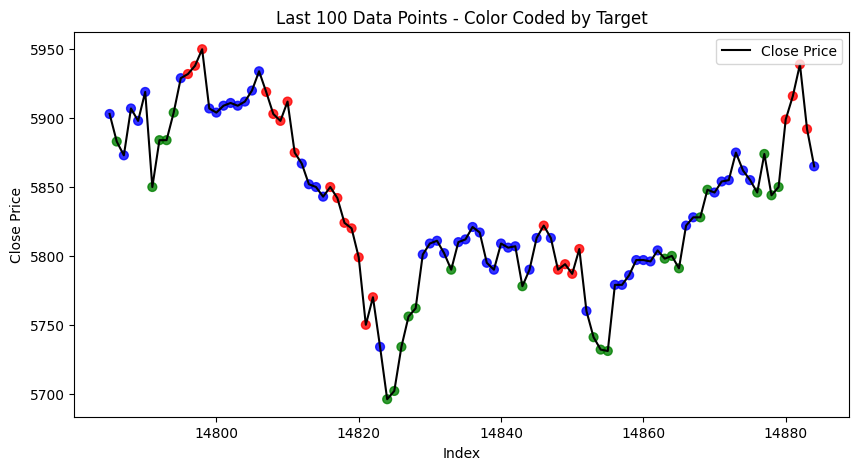

In [10]:
import matplotlib.pyplot as plt

# 1) Extract the last 100 rows from your DataFrame
df_tail = df.tail(100).copy()

# 2) If your target is stored as -1, 0, 1, define a color map:
# target_colors = {-1: 'red', 0: 'blue', 1: 'green'}

# If your target is stored as 0, 1, 2 (remapped), define a color map:
target_colors = {-1: 'red', 0: 'blue', 1: 'green'}

# 3) Create a new column with color values based on your target
df_tail['color'] = df_tail['target'].map(target_colors)

# 4) Plot the 'close' price as a line
plt.figure(figsize=(10, 5))
plt.plot(df_tail.index, df_tail['close'], color='black', label='Close Price')

# 5) Scatter-plot the same points, but colored by target
plt.scatter(df_tail.index, df_tail['close'], c=df_tail['color'], s=40, alpha=0.8)

plt.title("Last 100 Data Points - Color Coded by Target")
plt.xlabel("Index")
plt.ylabel("Close Price")
plt.legend()
plt.show()


# Model Training

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 2) DEFINE FEATURE AND TARGET COLUMNS
features = [
    "open", "high", "low", "close", "volume",
    "MACD_12_26_9", "MACDh_12_26_9", "MACDs_12_26_9",
    "CCI_14_0.015", "CMF_20"
]
target_col = "target"  # Assumes values are 0, 1, 2

# 3) DROP ROWS WITH MISSING VALUES (if any) in features or target
df.dropna(subset=features + [target_col], inplace=True)

# 4) SCALE THE FEATURES
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# 5) EXTRACT THE FEATURE AND TARGET ARRAYS
data = df[features].values   # Shape: (num_samples, num_features)
target = df[target_col].values  # Shape: (num_samples,)

# 6) CREATE SEQUENCES USING A SLIDING WINDOW
timesteps = 20  # Number of timesteps per sequence
X_seq = []
y_seq = []
for i in range(len(data) - timesteps):
    # Each sequence is timesteps long
    X_seq.append(data[i:i+timesteps])
    # The target for the sequence is taken from the last timestep
    y_seq.append(target[i+timesteps-1])
X_seq = np.array(X_seq)  # Shape: (samples, timesteps, num_features)
y_seq = np.array(y_seq)  # Shape: (samples,)

print("Shape of X_seq:", X_seq.shape)
print("Shape of y_seq:", y_seq.shape)

# 7) SPLIT THE DATA INTO TRAINING AND TEST SETS (preserving temporal order)
split_index = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_index], X_seq[split_index:]
y_train, y_test = y_seq[:split_index], y_seq[split_index:]

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


Shape of X_seq: (14832, 20, 10)
Shape of y_seq: (14832,)
Training samples: (11865, 20, 10)
Testing samples: (2967, 20, 10)


In [21]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, confusion_matrix

# Remap labels: -1 -> 0, 0 -> 1, 1 -> 2
y_train = y_train + 1
y_test = y_test + 1

# Define a custom Transformer block with L2 regularization
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1, l2_reg=1e-4):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(
            num_heads=num_heads, 
            key_dim=embed_dim,
            kernel_regularizer=l2(l2_reg)
        )
        self.ffn = tf.keras.Sequential([
            Dense(ff_dim, activation="relu", kernel_regularizer=l2(l2_reg)),
            Dense(embed_dim, kernel_regularizer=l2(l2_reg))
        ])
        self.layernorm1 = LayerNormalization(epsilon=1e-6)
        self.layernorm2 = LayerNormalization(epsilon=1e-6)
        self.dropout1 = Dropout(rate)
        self.dropout2 = Dropout(rate)

    def call(self, inputs, training=False):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Build the Transformer-based model
def build_transformer_model(timesteps, n_features, 
                           embed_dim=128, num_heads=8, 
                           ff_dim=256, num_transformer_blocks=4,
                           l2_reg=1e-4):
    inputs = Input(shape=(timesteps, n_features))
    
    # Initial projection with regularization
    x = Dense(embed_dim, kernel_regularizer=l2(l2_reg))(inputs)
    
    # Stack transformer blocks
    for _ in range(num_transformer_blocks):
        x = TransformerBlock(
            embed_dim=embed_dim,
            num_heads=num_heads,
            ff_dim=ff_dim,
            rate=0.1,
            l2_reg=l2_reg
        )(x)
    
    # Global pooling and final layers
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(l2_reg))(x)
    x = Dropout(0.2)(x)
    outputs = Dense(3, activation='softmax', kernel_regularizer=l2(l2_reg))(x)
    
    return Model(inputs=inputs, outputs=outputs)

# Define model parameters
timesteps = 20
feature_cols = ["open", "high", "low", "close", "volume",
                "MACD_12_26_9", "MACDh_12_26_9", "MACDs_12_26_9",
                "CCI_14_0.015", "CMF_20"]
n_features = len(feature_cols)

# Build the model
model = build_transformer_model(
    timesteps=timesteps,
    n_features=n_features,
    embed_dim=128,
    num_heads=8,
    ff_dim=256,
    num_transformer_blocks=4,
    l2_reg=1e-4
)

# Learning rate schedule
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.96
)

# Enhanced optimizer configuration
optimizer = Adam(
    learning_rate=lr_schedule,
    beta_1=0.9,
    beta_2=0.98,
    epsilon=1e-9
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)
model.summary()

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# --- Train the Model ---
# Assuming X_train and y_train are defined from your sequence creation process
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# --- Evaluate the Model ---
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 20, 10)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 20, 128)             │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_23                 │ (None, 20, 128)             │         593,920 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_24                 │ (None, 20, 128)             │         593,920 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_25                 │ (None, 20, 128)             │         593,920 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_26                 │ (None, 20, 128)             │         593,920 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_6           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_92 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_93 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,385,539 (9.10 MB)

 Trainable params: 2,385,539 (9.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 49s 238ms/step - accuracy: 0.6074 - loss: 1.2243 - val_accuracy: 0.6367 - val_loss: 1.0827
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 41s 240ms/step - accuracy: 0.6350 - loss: 1.0874 - val_accuracy: 0.6367 - val_loss: 1.0306
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 37s 248ms/step - accuracy: 0.6382 - loss: 1.0196 - val_accuracy: 0.6367 - val_loss: 0.9658
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 37s 248ms/step - accuracy: 0.6324 - loss: 0.9706 - val_accuracy: 0.6367 - val_loss: 0.9384
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 37s 248ms/step - accuracy: 0.6431 - loss: 0.9317 - val_accuracy: 0.6367 - val_loss: 0.9243
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 37s 251ms/step - accuracy: 0.6348 - loss: 0.9326 - val_accuracy: 0.6367 - val_loss: 0.9198
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 37s 249ms/step - accuracy: 0.6330 - loss: 0.9315 - val_accuracy: 0.6367 - val_loss: 0.9309
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 37s 251ms/step - accuracy: 0.6352 - loss: 0

# Model testing

In [4]:
import history
df_5m = history.fetch_historical_data("MCX:CRUDEOILM25MARFUT", "5", ATR=12, mult=2)

In [6]:
df_5m = df_5m.dropna()

In [8]:
import pandas as pd
import pickle
import pandas_ta as ta

with open("model.pkl", "rb") as f:
    azure_model = pickle.load(f)
    
df_5m.ta.macd(append=True)
df_5m.ta.rsi(append=True)
df_5m.ta.stoch(append=True)
df_5m.ta.bbands(append=True)
df_5m.ta.supertrend(append=True)
df_5m.ta.obv(append=True)

features = ["timestamp",
            "open", "high", "low", "close", "volume",
            "MACD_12_26_9", "MACDh_12_26_9", "MACDs_12_26_9","RSI_14","STOCHk_14_3_3","STOCHd_14_3_3","BBL_5_2.0","BBM_5_2.0","BBU_5_2.0","BBB_5_2.0","BBP_5_2.0","SUPERT_7_3.0","OBV","SUPERTd_7_3.0",
        ]
predictions = azure_model.predict(df_5m[features])
df_5m["prediction"] = predictions
print(df_5m[["timestamp", "prediction"]])

              timestamp  prediction
0   2025-03-18 22:15:00           0
1   2025-03-18 22:20:00           0
2   2025-03-18 22:25:00           1
3   2025-03-18 22:30:00           0
4   2025-03-18 22:35:00           0
..                  ...         ...
170 2025-03-19 21:50:00           0
171 2025-03-19 21:55:00           0
172 2025-03-19 22:00:00           0
173 2025-03-19 22:05:00           0
174 2025-03-19 22:10:00           0

[175 rows x 2 columns]


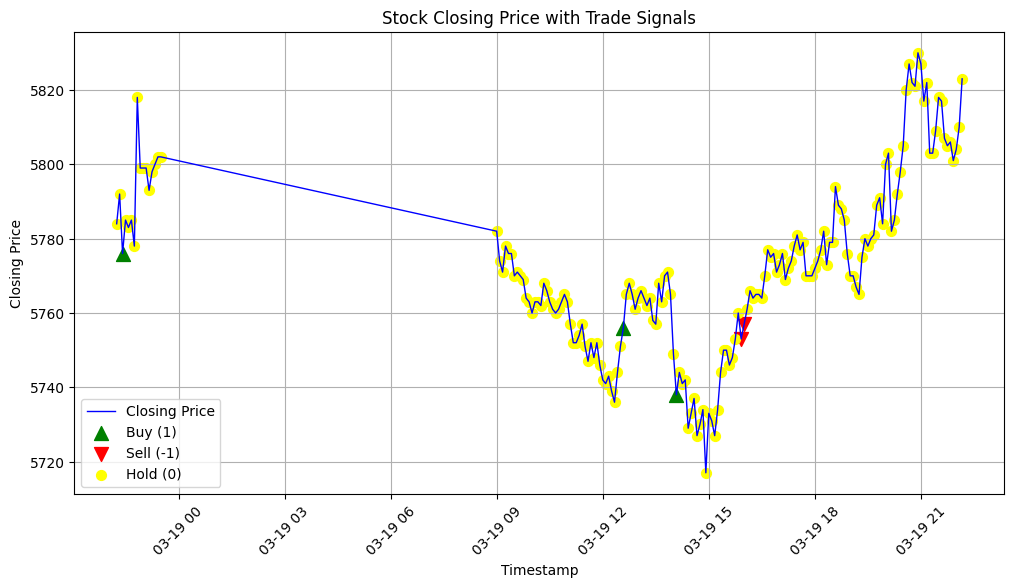

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot closing price
plt.plot(df_5m["timestamp"], df_5m["close"], label="Closing Price", color="blue", linewidth=1)

# Plot buy signals (prediction == 1)
plt.scatter(df_5m[df_5m["prediction"] == 1]["timestamp"], df_5m[df_5m["prediction"] == 1]["close"], 
            marker="^", color="green", s=100, label="Buy (1)")

# Plot sell signals (prediction == -1)
plt.scatter(df_5m[df_5m["prediction"] == -1]["timestamp"], df_5m[df_5m["prediction"] == -1]["close"], 
            marker="v", color="red", s=100, label="Sell (-1)")

# Plot hold signals (prediction == 0)
plt.scatter(df_5m[df_5m["prediction"] == 0]["timestamp"], df_5m[df_5m["prediction"] == 0]["close"], 
            marker="o", color="yellow", s=50, label="Hold (0)")

# Formatting
plt.xlabel("Timestamp")
plt.ylabel("Closing Price")
plt.title("Stock Closing Price with Trade Signals")
plt.legend()
plt.xticks(rotation=45)  # Rotate timestamps for better visibility
plt.grid()

plt.show()


In [10]:
df_5m.tail()

,timestamp,open,high,low,close,volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,...,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,SUPERT_7_3.0,SUPERTd_7_3.0,SUPERTl_7_3.0,SUPERTs_7_3.0,OBV,prediction
170,2025-03-19 21:50:00,5804,5810,5801,5806,67,4.73,-2.50,7.23,50.68,...,5810.60,5821.96,0.39,0.30,5795.19,1,5795.19,NaN,782.00,0
171,2025-03-19 21:55:00,5805,5812,5801,5801,55,3.65,-2.86,6.51,47.60,...,5807.20,5817.81,0.37,0.21,5795.19,1,5795.19,NaN,727.00,0
172,2025-03-19 22:00:00,5801,5804,5794,5804,53,3.00,-2.81,5.81,49.58,...,5804.60,5808.72,0.14,0.43,5795.19,1,5795.19,NaN,780.00,0
173,2025-03-19 22:05:00,5803,5810,5803,5810,38,2.94,-2.29,5.24,53.37,...,5805.20,5811.05,0.20,0.91,5795.19,1,5795.19,NaN,818.00,0
174,2025-03-19 22:10:00,5814,5823,5814,5823,48,3.90,-1.07,4.97,60.33,...,5808.80,5824.16,0.53,0.96,5795.19,1,5795.19,NaN,866.00,0
